In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('.//heart_disease_uci.csv')
data.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [3]:
# Perform basic exploratory data analysis
# Summary statistics
print(data.describe())


               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

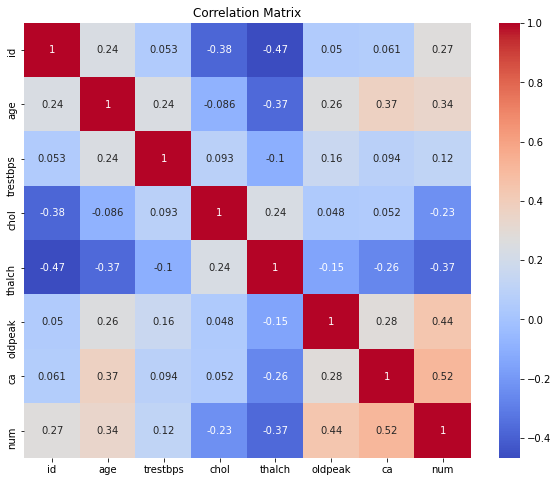

In [4]:
# Correlation matrix
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


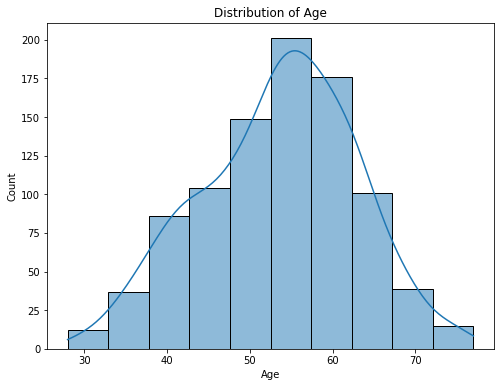

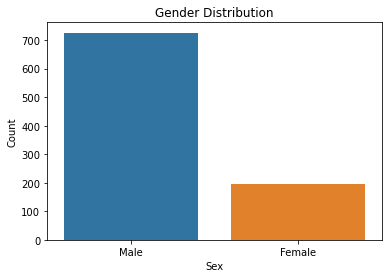

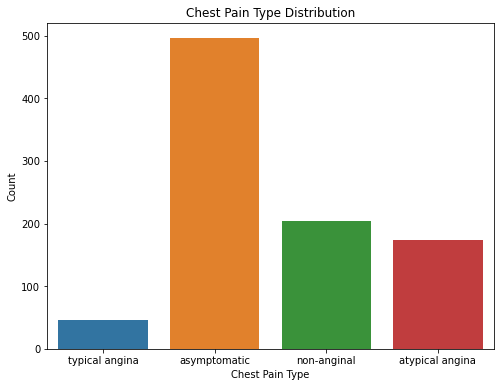

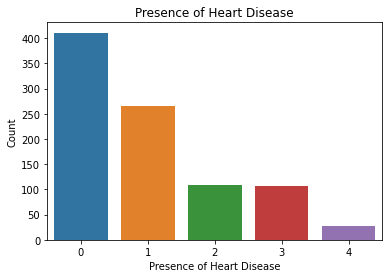

In [5]:

# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['sex'])
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Chest pain type distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['cp'])
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Presence of heart disease
plt.figure(figsize=(6, 4))
sns.countplot(data['num'])
plt.title('Presence of Heart Disease')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Count')
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
# Drop unnecessary columns
data = data.drop(['id', 'dataset'], axis=1)

In [8]:
# Convert categorical variables to numerical using LabelEncoder
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
label_encoder = LabelEncoder()
for col in cat_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [9]:
# Split the data into features and target
X = data.drop('num', axis=1)
y = data['num']



In [10]:
# Remove rows with NaN values
X = X.dropna()

# Print the updated feature matrix
print(X)

     age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3     145.0  233.0    1        0   150.0      0      2.3   
1     67    1   0     160.0  286.0    0        0   108.0      1      1.5   
2     67    1   0     120.0  229.0    0        0   129.0      1      2.6   
3     37    1   2     130.0  250.0    0        1   187.0      0      3.5   
4     41    0   1     130.0  204.0    0        0   172.0      0      1.4   
..   ...  ...  ..       ...    ...  ...      ...     ...    ...      ...   
676   60    1   0     130.0    0.0    2        2   130.0      1      1.1   
691   62    1   3     120.0    0.0    2        0   134.0      0     -0.8   
717   72    1   2     160.0    0.0    2        0   114.0      0      1.6   
748   56    1   0     120.0  100.0    0        1   120.0      1      1.5   
759   59    1   0     154.0    0.0    0        2   131.0      1      1.5   

     slope   ca  thal  
0        0  0.0     0  
1        1  3.0     1  
2        1  2.0

In [11]:
print(X.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [308, 920]

In [ ]:
# Scale the numerical features using StandardScaler
scaler = StandardScaler()
num_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])



In [ ]:
# Print the preprocessed data
print("Preprocessed X_train:")
print(X_train.head())
print("\nPreprocessed X_test:")
print(X_test.head())
print("\nPreprocessed y_train:")
print(y_train.head())
print("\nPreprocessed y_test:")
print(y_test.head())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forests
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Gradient Boosting Methods
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Support Vector Machines
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Neural Networks
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Ensemble methods (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[('lr', lr_model), ('dt', dt_model), ('rf', rf_model),
                                              ('gb', gb_model), ('svm', svm_model), ('nb', nb_model),
                                              ('knn', knn_model), ('nn', nn_model)])
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

# Ensemble methods (Bagging Classifier)
bagging_model = BaggingClassifier(base_estimator=dt_model)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# Print the accuracies
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Trees Accuracy:", dt_accuracy)
print("Random Forests Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Support Vector Machines Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Neural Networks Accuracy:", nn_accuracy)
print("Ensemble (Voting) Accuracy:", ensemble_accuracy)
print("Ensemble (Bagging) Accuracy:", bagging_accuracy)
